In [37]:
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
directory = Path("./ODIR-5K_Training_Dataset")

i = 0
for item in os.listdir(directory):
    i += 1

print(i)

7000


In [5]:
directory = Path("./ODIR-5K_Testing_Images")

i = 0
for item in os.listdir(directory):
    i += 1

print(i)

1000


In [10]:
traindf = pd.read_excel("ODIR-5K_Training_Annotations(Updated)_V2.xlsx")

In [15]:
traindf

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
3496,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3497,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
3498,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [12]:
traindf.columns

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O'],
      dtype='object')

In [13]:
traindf.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,2218.233143,57.854000,0.325714,0.322286,0.061429,0.060571,0.046857,0.029429,0.049714,0.279714
std,1415.437872,11.724064,0.468708,0.467419,0.240149,0.238577,0.211363,0.169029,0.217385,0.448923
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,876.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2372.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3247.250000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


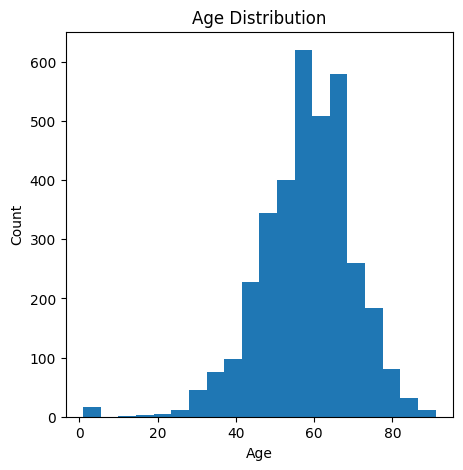

In [77]:
plt.figure(figsize=(5,5))
plt.hist(traindf['Patient Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [36]:
traindf.isna().sum()

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
dtype: int64

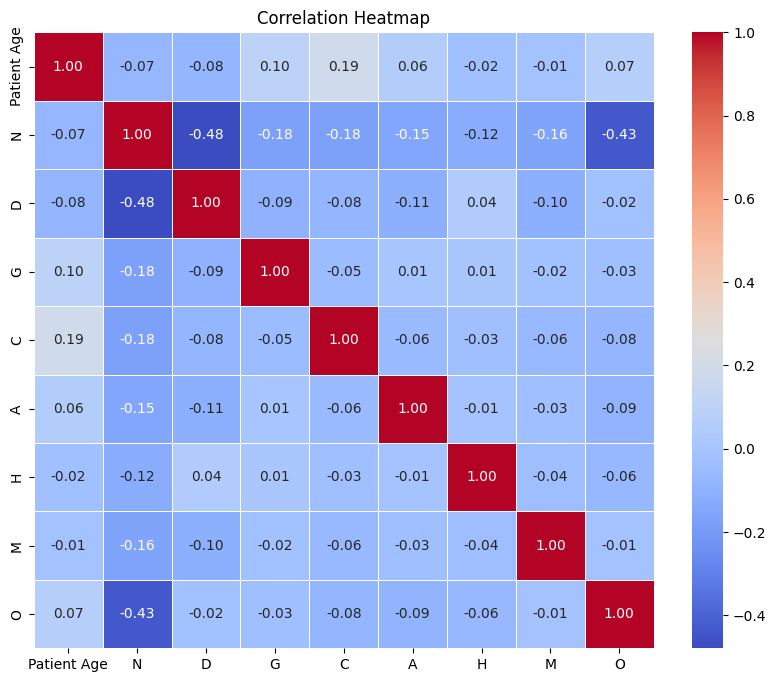

In [70]:
numerical_attributes = ['Patient Age', 'N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

correlation_matrix = traindf[numerical_attributes].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


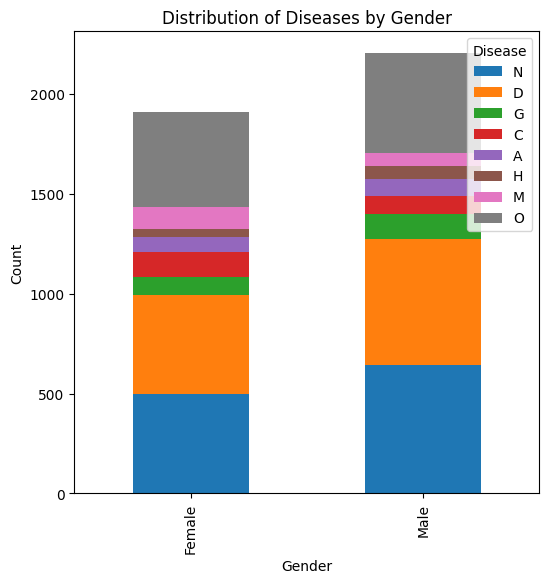

In [67]:
disease_columns = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

grouped = traindf.groupby('Patient Sex')[disease_columns].sum()

fig, ax = plt.subplots(figsize=(6, 6))
grouped.plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribution of Diseases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Disease', loc='upper right')
plt.show()

